In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/tabular-playground-series-sep-2021/train.csv
/kaggle/input/tabular-playground-series-sep-2021/test.csv
/kaggle/input/tabular-playground-series-sep-2021/sample_solution.csv


# Imports

In [3]:
# import packages

import joblib
import warnings

import matplotlib
import matplotlib.pyplot as plt
from matplotlib import ticker
import seaborn as sns

# setting up options
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('float_format', '{:f}'.format)
warnings.filterwarnings('ignore')

In [4]:
train_data = pd.read_csv('../input/tabular-playground-series-sep-2021/train.csv')
test_data = pd.read_csv('../input/tabular-playground-series-sep-2021/test.csv')
sub_data = pd.read_csv('../input/tabular-playground-series-sep-2021/sample_solution.csv')

In [5]:
train_data.describe()

,id,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24,f25,f26,f27,f28,f29,f30,f31,f32,f33,f34,f35,f36,f37,f38,f39,f40,f41,f42,f43,f44,f45,f46,f47,f48,f49,f50,f51,f52,f53,f54,f55,f56,f57,f58,f59,f60,f61,f62,f63,f64,f65,f66,f67,f68,f69,f70,f71,f72,f73,f74,f75,f76,f77,f78,f79,f80,f81,f82,f83,f84,f85,f86,f87,f88,f89,f90,f91,f92,f93,f94,f95,f96,f97,f98,f99,f100,f101,f102,f103,f104,f105,f106,f107,f108,f109,f110,f111,f112,f113,f114,f115,f116,f117,f118,claim
count,957919.000000,942672.000000,942729.000000,942428.000000,942359.000000,942514.000000,942398.000000,942415.000000,942546.000000,942670.000000,942696.000000,942494.000000,942326.000000,942455.000000,942697.000000,942410.000000,942475.000000,942492.000000,942594.000000,942445.000000,942464.000000,942465.000000,942641.000000,942563.000000,942289.000000,942413.000000,942561.000000,942475.000000,942654.000000,942504.000000,942527.000000,942241.000000,942390.000000,942427.000000,942671.000000,942585.000000,942556.000000,942607.000000,942485.000000,942360.000000,942551.000000,942523.000000,942503.000000,942464.000000,942456.000000,942436.000000,942286.000000,942396.000000,942473.000000,942539.000000,942357.000000,942487.000000,942604.000000,942457.000000,942494.000000,942497.000000,942452.000000,942346.000000,942464.000000,942519.000000,942359.000000,942488.000000,942401.000000,942509.000000,942341.000000,942505.000000,942505.000000,942433.000000,942300.000000,942367.000000,942657.000000,942437.000000,942700.000000,942382.000000,942349.000000,942463.000000,942350.000000,942668.000000,942470.000000,942541.000000,942599.000000,942573.000000,942434.000000,942292.000000,942534.000000,942470.000000,942396.000000,942603.000000,942371.000000,942474.000000,942437.000000,942412.000000,942427.000000,942462.000000,942505.000000,942320.000000,942634.000000,942654.000000,942631.000000,942485.000000,942393.000000,942570.000000,942751.000000,942319.000000,942721.000000,942533.000000,942375.000000,942535.000000,942579.000000,942390.000000,942554.000000,942420.000000,942509.000000,942686.000000,942481.000000,942360.000000,942330.000000,942512.000000,942707.000000,957919.000000
mean,478959.000000,0.090201,0.345964,4068.744207,0.201214,0.304869,-0.071458,1620.843815,377164.164157,1806053749440377.750000,5323.442367,0.729518,1844435560.081402,0.247759,6.999152,0.019394,444.804439,6.892520,4.491982,22.448660,203.782031,61070.567499,2.269597,87.166891,0.341240,414.983986,3379987643255.859863,1254164236339.915283,2256887.491631,0.329054,7.882455,0.394211,134469.988473,357905.544068,-0.000005,27823178865941924.000000,185.485192,406.072571,1.768743,1981.074344,0.359381,446.664352,0.359571,6.946628,29.761954,0.013454,4.277615,0.029221,6.378937,-0.425397,0.299912,56.638828,2683.140670,12.204214,137.373234,0.250631,0.411071,0.000012,-0.329313,3.058053,0.548762,0.273404,2469246893.886226,36.836014,0.212860,47835.926728,84.103569,608.154443,29.001846,1.212457,0.418355,1.544838,482.147786,796463977059769.125000,1063963343392.838989,0.376600,6.876209,10721.517913,10525.861146,1.555219,0.194237,3.240370,105381114265.853119,152.850973,6128693.945055,635.301741,32514136522.495438,26.598567,207.260994,3805.100719,6.733556,0.366754,4868.608259,132.264261,0.821190,13.120677,3849.687894,0.999970,14156843439109.169922,1.683151,0.425840,20.213776,321575.951426,548.647493,3855.616303,0.178027,0.160832,0.014196,1671872572.646981,0.398622,-19.926398,2.074530,23.885245,1.748777,63152.973540,1.208876,42769052891229504.000000,3959.204669,0.559267,0.498492
std,276527.540591,0.043564,0.146251,6415.829440,0.212510,0.145343,2.123777,1276.281403,345432.472849,2335204188640509.000000,10068.380032,1.495535,2125477558.021488,0.101156,6.621472,0.101880,631.327086,1.715735,3.899241,14.609968,281.015052,89859.616863,0.896001,37.350264,1.643595,314.822410,5655523939854.593750,1642736110554.133789,2303909.489554,0.433861,5.939864,0.781932,203660.525285,462667.049745,0.001534,34527073956544216.000000,701.76

In [6]:
#train_data.count()

In [7]:
train_data.head()

,id,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24,f25,f26,f27,f28,f29,f30,f31,f32,f33,f34,f35,f36,f37,f38,f39,f40,f41,f42,f43,f44,f45,f46,f47,f48,f49,f50,f51,f52,f53,f54,f55,f56,f57,f58,f59,f60,f61,f62,f63,f64,f65,f66,f67,f68,f69,f70,f71,f72,f73,f74,f75,f76,f77,f78,f79,f80,f81,f82,f83,f84,f85,f86,f87,f88,f89,f90,f91,f92,f93,f94,f95,f96,f97,f98,f99,f100,f101,f102,f103,f104,f105,f106,f107,f108,f109,f110,f111,f112,f113,f114,f115,f116,f117,f118,claim
0,0,0.108590,0.004314,-37.566000,0.017364,0.289150,-10.251000,135.120000,168900.000000,399240000000000.000000,86.489000,0.598810,1423200000.000000,0.272400,9.455600,-0.050305,1938.300000,8.633100,4.060700,26.867000,-1.180000,10961.000000,1.539700,135.320000,-1.496500,440.080000,2590100000000.000000,2194200000.000000,2968800.000000,0.001431,13.327000,0.750500,18509.000000,146820.000000,-0.000276,10906000000000000.000000,1705.400000,414.290000,3.539200,1888.000000,0.968930,18.388000,-0.001583,7.705900,5.932500,0.025693,4.560400,0.611220,10.795000,0.341930,0.235010,NaN,5237.700000,1.296100,163.660000,0.403780,0.188600,-0.001446,-0.354160,6.643200,0.305340,0.514020,1907300000.000000,29.861000,0.965010,1797.200000,72.178000,108.620000,1.979900,1.290700,0.995190,1.322800,827.340000,777990000000000.000000,41299000000.000000,0.006994,6.983500,43956.000000,1978.200000,5.508400,-0.001081,6.124400,123180000000.000000,275.920000,5308500.000000,1704.000000,50224000000.000000,53.398000,-2.201200,6871.000000,3.886200,-0.005580,5252.100000,166.690000,1.607400,0.665340,7768.900000,0.996620,112570000000.000000,2.243200,0.934160,0.650560,94569.000000,21.471000,8214.100000,0.288010,0.097826,0.001071,1412400000.000000,0.110930,-12.228000,1.748200,1.909600,-7.115700,4378.800000,1.209600,861340000000000.000000,140.100000,1.017700,1
1,1,0.100900,0.299610,11822.000000,0.276500,0.459700,-0.837330,1721.900000,119810.000000,3874100000000000.000000,9953.600000,1.209300,3334100000.000000,0.286310,-0.012858,-0.019912,10.284000,6.187200,1.041900,4.640400,31.877000,123620.000000,1.395100,125.810000,1.198900,136.450000,9098100000.000000,40041000000.000000,1564000.000000,0.000204,3.107400,1.503300,238000.000000,21440.000000,-0.001344,30794000000000000.000000,229.100000,844.820000,1.468000,4726.500000,0.915380,-1.532100,0.982600,7.111200,2.079700,0.042321,4.252300,0.418710,5.449900,0.012737,0.386470,7.308200,283.210000,-0.925520,140.800000,0.247390,-0.001656,-0.000975,-0.226290,2.424600,0.771470,0.011613,1803700000.000000,64.604000,0.262650,4455.000000,78.339000,745.510000,2.906900,1.482600,1.005100,1.497400,84.446000,3505600000000000.000000,2242300000.000000,0.896300,4.674900,17713.000000,9003.100000,-4.354600,0.254100,6.919100,183240000000.000000,9.651000,32800.000000,1480.600000,23006000000.000000,44.051000,205.690000,4295.300000,13.388000,0.468430,754.610000,83.233000,1.189000,29.550000,7343.700000,0.998150,48777000000000.000000,1.270800,-0.000969,5.295200,6779.000000,227.720000,34.342000,0.340300,0.143370,0.049276,1903200000.000000,0.976730,-56.758000,4.168400,0.348080,4.142000,913.230000,1.246400,7575100000000000.000000,1861.000000,0.283590,0
2,2,0.178030,-0.006980,907.270000,0.272140,0.459480,0.173270,2298.000000,360650.000000,12245000000000.000000,15827.000000,0.381640,1230300000.000000,0.258070,2.455600,NaN,26.873000,7.546300,1.996700,1.952600,817.760000,-2948.700000,2.005400,1.682600,1.196800,74.624000,-32739000000.000000,57189000000.000000,11058.000000,-0.003097,8.024100,1.131800,27940.000000,862460.000000,-0.002207,58491000000000.000000,-897.840000,NaN,1.356100,3063.400000,0.086232,16.106000,0.001481,11.476000,5.343000,0.012162,4.101800,-0.882700,8.122800,-0.676690,0.337700,-1.073200,4097.000000,13.458000,159.240000,0.322300,0.560090,0.000455,-0.160830,3.575300,0.609700,0.028301,527130000.000000,14.454000,0.115490,14605.000000,36.992000,-9.639100,64.267000,NaN,0.992780,2.589100,430.400000,-44535000000000.000000,5144900000000.000000,0.099591,6.551600,1887.500000,43319.

In [8]:
#No. of rows
print(f'Total no of rows: {train_data.shape[0]}')
#No of columns
print(f'Total no of columns: {train_data.shape[1]}')
#No of non-null values
print(f'Total no of non-null values: {sum(train_data.notnull().sum())}')
#No of null values
print(f'Total no of missing values: {sum(train_data.isna().sum())}')

Total no of rows: 957919
Total no of columns: 120
Total no of non-null values: 113129498
Total no of missing values: 1820782


In [9]:
test_data.head()

,id,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24,f25,f26,f27,f28,f29,f30,f31,f32,f33,f34,f35,f36,f37,f38,f39,f40,f41,f42,f43,f44,f45,f46,f47,f48,f49,f50,f51,f52,f53,f54,f55,f56,f57,f58,f59,f60,f61,f62,f63,f64,f65,f66,f67,f68,f69,f70,f71,f72,f73,f74,f75,f76,f77,f78,f79,f80,f81,f82,f83,f84,f85,f86,f87,f88,f89,f90,f91,f92,f93,f94,f95,f96,f97,f98,f99,f100,f101,f102,f103,f104,f105,f106,f107,f108,f109,f110,f111,f112,f113,f114,f115,f116,f117,f118
0,957919,0.165850,0.487050,1295.000000,0.023100,0.319000,0.901880,573.290000,3743.700000,2705700000000.000000,6221.000000,1.172000,5175000000.000000,0.258310,3.420500,0.044983,1001.600000,10.104000,10.536000,19.517000,-1.120900,1577.600000,2.184700,96.109000,1.153500,95.865000,2847100000000.000000,96421000000.000000,6406000.000000,0.002990,6.635300,-0.015913,21723.000000,67604.000000,-0.000227,60462000000000000.000000,203.580000,301.790000,1.346100,5524.600000,-0.003163,21.883000,0.027383,7.211300,24.825000,-0.001420,4.895000,-1.087100,7.056100,-1.061500,0.000100,1.856000,449.990000,-0.362860,160.630000,0.248010,0.623000,0.000116,-0.393840,1.903800,0.068588,0.020439,2506500000.000000,48.164000,-0.002272,78643.000000,112.360000,1021.900000,11.481000,1.157300,0.002995,1.819200,1096.800000,300410000000000.000000,2042300000.000000,0.085500,4.631200,1683.100000,9833.600000,NaN,0.510410,4.032200,247790000000.000000,69.264000,5494800.000000,1239.000000,534930000.000000,5.308600,182.590000,829.170000,5.231900,0.010301,3640.800000,112.120000,-0.434420,11.161000,3755.700000,0.999260,53382000000.000000,1.386700,-0.001878,58.794000,75657.000000,187.240000,1258.900000,0.163340,0.055398,0.020002,795640000.000000,0.162530,-22.189000,2.065500,0.430880,-10.741000,81606.000000,1.194000,198040000000000.000000,2017.100000,0.463570
1,957920,0.129650,0.373480,1763.000000,0.728840,0.332470,-1.263100,875.550000,554370.000000,595570000000000.000000,934.430000,1.897900,4905100000.000000,0.284710,2.138700,-0.034328,35.223000,6.587300,12.734000,29.590000,4.163900,31915.000000,3.115800,109.430000,-0.852200,991.370000,4700100000.000000,1618200000000.000000,967810.000000,1.021500,2.961700,0.810310,415570.000000,384720.000000,0.002243,6712900000000000.000000,228.590000,33.952000,1.493800,2067.500000,-0.002343,32.772000,0.092283,6.536300,2.077300,0.046237,4.459000,-0.840920,4.447300,-1.001200,0.003750,99.647000,8146.800000,22.504000,153.400000,0.430760,0.743010,-0.000047,-0.116920,1.654400,0.467440,0.129650,444280000.000000,38.506000,0.396220,74296.000000,93.629000,-15.691000,30.655000,1.231100,1.004400,2.248400,780.870000,121360000000000.000000,348820000000.000000,-0.000792,6.999300,2451.600000,10483.000000,-5.354400,0.067286,5.404400,246260000000.000000,810.300000,860670.000000,2165.200000,271150000.000000,10.232000,515.410000,262.710000,5.635700,0.374220,420.160000,116.230000,1.269800,0.786190,1207.000000,1.000700,20650000000000.000000,1.288800,0.248850,9.985700,16323.000000,244.460000,647.580000,0.253820,0.008800,0.018479,112060000.000000,0.815280,-1.634200,1.573600,-1.071200,11.832000,90114.000000,1.150700,43880000000000000.000000,6638.900000,0.281250
2,957921,0.120190,0.445210,736.260000,0.046150,0.296050,0.316650,2659.500000,317140.000000,397780000000000.000000,131.810000,-0.484040,3800000.000000,0.371730,0.402450,0.015119,1991.600000,6.005000,0.991900,11.949000,888.070000,887.700000,3.523700,108.140000,-1.654200,528.140000,2463600000000.000000,9005900000.000000,7259.300000,1.007400,2.612300,1.062500,-208010.000000,65708.000000,0.001391,81298000000000.000000,-84.032000,NaN,1.755600,4729.200000,0.003527,861.660000,0.902670,9.393400,58.785000,0.007244,5.664500,-0.627470,6.580600,-1.128200,0.386500,56.547000,125.360000,12.703000,147.380000,0.414370,0.519980,0.000857,-0.120650,5.411500,0.772530,0.128850,5664900000.000000,50.894000,0.378710,80045.000000,65.224000,780.210000,14.125000,1.165700,-0.001285,1.066300,432.010000,-595310000000.000000,1383400000000.000000,-0.006236,5.60520

In [10]:
train_data.shape[0]

957919

In [11]:
train_data.shape[1]

120

In [12]:
#No. of rows
print(f'Total no of rows: {test_data.shape[0]}')
#No of columns
print(f'Total no of columns: {test_data.shape[1]}')
#No of non-null values
print(f'Total no of non-null values: {sum(test_data.notnull().sum())}')
#No of null values
print(f'Total no of missing values: {sum(test_data.isna().sum())}')

Total no of rows: 493474
Total no of columns: 119
Total no of non-null values: 57787188
Total no of missing values: 936218


In [13]:
sub_data.head()

,id,claim
0,957919,0.500000
1,957920,0.500000
2,957921,0.500000
3,957922,0.500000
4,957923,0.500000


# Handling Missing values

1. Train

In [14]:
missing_train_data = pd.DataFrame(train_data.isna().sum())
missing_train_data = missing_train_data.drop(['id', 'claim']).reset_index()
missing_train_data.columns = ['feature', 'count']
missing_train_percent_data = missing_train_data.copy()
missing_train_percent_data['count'] = missing_train_data['count']/train_data.shape[0]

In [15]:
missing_train_percent_data

,feature,count
0,f1,0.015917
1,f2,0.015857
2,f3,0.016172
3,f4,0.016244
4,f5,0.016082
5,f6,0.016203
6,f7,0.016185
7,f8,0.016048
8,f9,0.015919
9,f10,0.015892


2. Test Data

In [16]:
missing_test_data = pd.DataFrame(test_data.isna().sum())
missing_test_data = missing_test_data.drop(['id']).reset_index()
missing_test_data.columns = ['feature', 'count']

missing_test_percent_data = missing_test_data.copy()
missing_test_percent_data['count'] = missing_test_data['count']/test_data.shape[0]

In [17]:
missing_test_percent_data

,feature,count
0,f1,0.015831
1,f2,0.015991
2,f3,0.015796
3,f4,0.015671
4,f5,0.015962
5,f6,0.016035
6,f7,0.016076
7,f8,0.015918
8,f9,0.015843
9,f10,0.016001


In [18]:
features = [feature for feature in train_data.columns if feature not in ['id', 'claim']]
missing_train_row = train_data[features].isna().sum(axis=1)
missing_train_row = pd.DataFrame(missing_train_row.value_counts()/train_data.shape[0]).reset_index()

In [19]:
missing_train_row.columns = ['no', 'count']

missing_test_row = test_data[features].isna().sum(axis=1)
missing_test_row = pd.DataFrame(missing_test_row.value_counts()/test_data.shape[0]).reset_index()
missing_test_row.columns = ['no', 'count']

In [20]:
missing_train_row

,no,count
0,0,0.375255
1,1,0.141143
2,2,0.136790
3,3,0.126977
4,4,0.097346
5,5,0.061967
6,6,0.033913
7,7,0.015978
8,8,0.006882
9,9,0.002512


In [21]:
missing_test_row = test_data[features].isna().sum(axis=1)
missing_test_row = pd.DataFrame(missing_test_row.value_counts()/test_data.shape[0]).reset_index()
missing_test_row.columns = ['no', 'count']

In [22]:
missing_test_row

,no,count
0,0,0.376297
1,1,0.140990
2,2,0.136943
3,3,0.126833
4,4,0.096481
5,5,0.061630
6,6,0.034036
7,7,0.016242
8,8,0.006726
9,9,0.002647


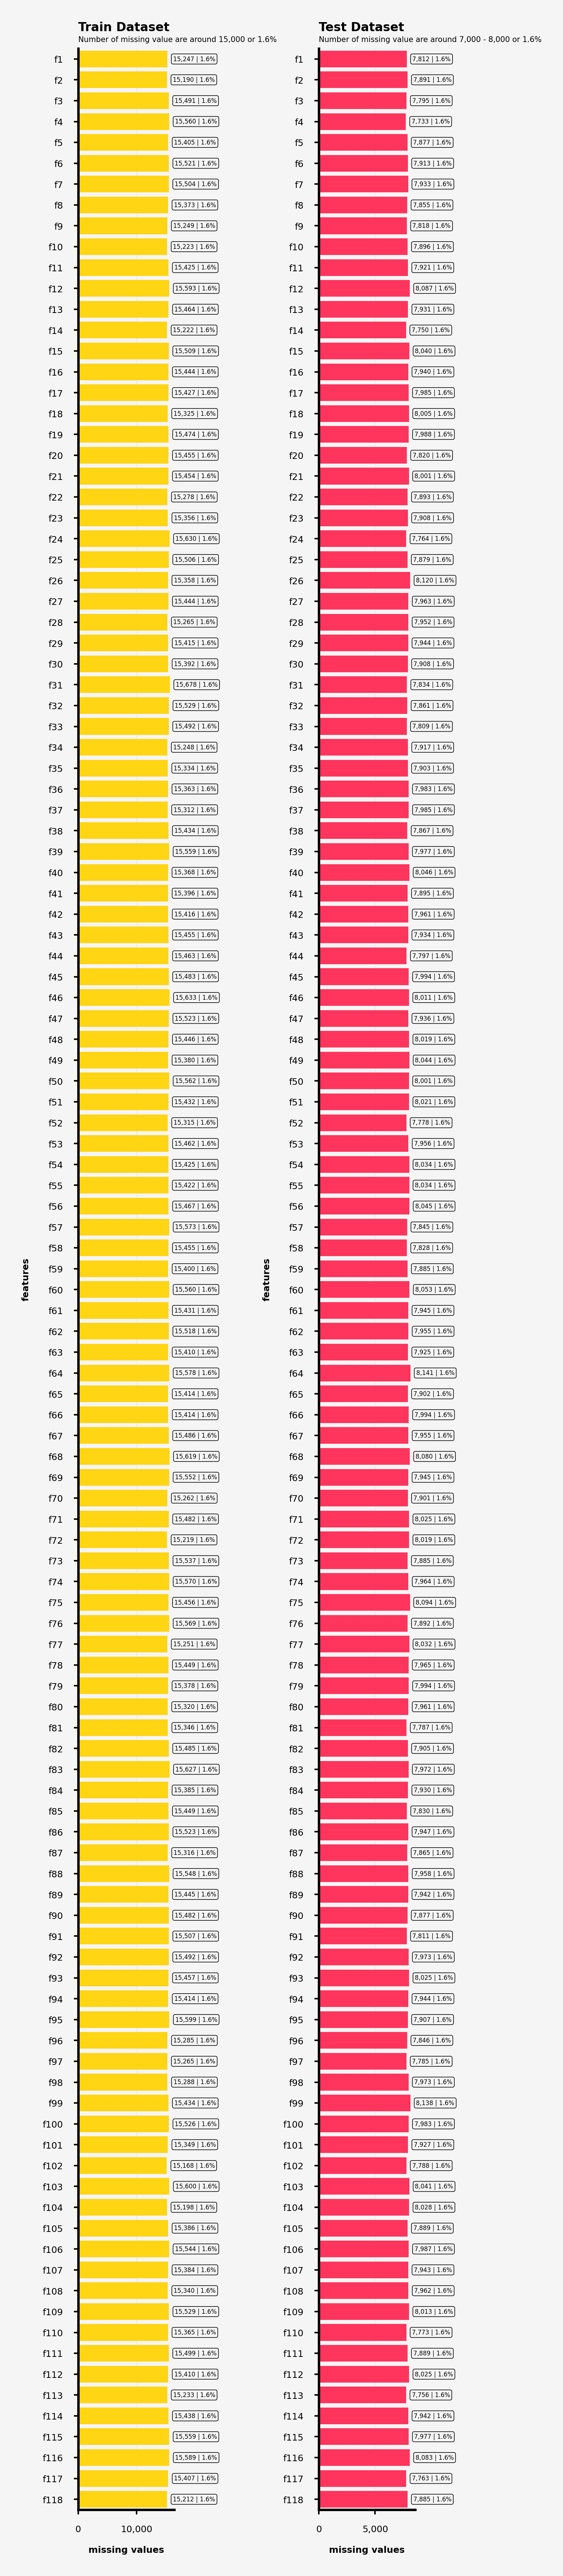

In [23]:
plt.rcParams['figure.dpi'] = 600
fig = plt.figure(figsize=(2, 15), facecolor='#f6f5f5')
gs = fig.add_gridspec(1, 2)
gs.update(wspace=1.5, hspace=0.05)

background_color = "#f6f5f5"
sns.set_palette(['#ffd514']*120)

ax0 = fig.add_subplot(gs[0, 0])
for s in ["right", "top"]:
    ax0.spines[s].set_visible(False)
ax0.set_facecolor(background_color)
ax0_sns = sns.barplot(ax=ax0, y=missing_train_data['feature'], x=missing_train_data['count'], 
                      zorder=2, linewidth=0, orient='h', saturation=1, alpha=1)
ax0_sns.set_xlabel("missing values",fontsize=3, weight='bold')
ax0_sns.set_ylabel("features",fontsize=3, weight='bold')
ax0_sns.tick_params(labelsize=3, width=0.5, length=1.5)
ax0_sns.grid(which='major', axis='x', zorder=0, color='#EEEEEE', linewidth=0.4)
ax0_sns.grid(which='major', axis='y', zorder=0, color='#EEEEEE', linewidth=0.4)
ax0.text(0, -1.8, 'Train Dataset', fontsize=4, ha='left', va='top', weight='bold')
ax0.text(0, -1.105, 'Number of missing value are around 15,000 or 1.6%', fontsize=2.5, ha='left', va='top')
ax0.get_xaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
# data label
for p in ax0.patches:
    value = f'{p.get_width():,.0f} | {(p.get_width()/train_data.shape[0]):,.1%}'
    x = p.get_x() + p.get_width() + 1000
    y = p.get_y() + p.get_height() / 2 
    ax0.text(x, y, value, ha='left', va='center', fontsize=2, 
            bbox=dict(facecolor='none', edgecolor='black', boxstyle='round', linewidth=0.2))
    
background_color = "#f6f5f5"
sns.set_palette(['#ff355d']*120)
    
ax3 = fig.add_subplot(gs[0, 1])
for s in ["right", "top"]:
    ax3.spines[s].set_visible(False)
ax3.set_facecolor(background_color)
ax3_sns = sns.barplot(ax=ax3, y=missing_test_data['feature'], x=missing_test_data['count'], 
                      zorder=2, linewidth=0, orient='h', saturation=1, alpha=1)
ax3_sns.set_xlabel("missing values",fontsize=3, weight='bold')
ax3_sns.set_ylabel("features",fontsize=3, weight='bold')
ax3_sns.tick_params(labelsize=3, width=0.5, length=1.5)
ax3_sns.grid(which='major', axis='x', zorder=0, color='#EEEEEE', linewidth=0.4)
ax3_sns.grid(which='major', axis='y', zorder=0, color='#EEEEEE', linewidth=0.4)
ax3.text(0, -1.8, 'Test Dataset', fontsize=4, ha='left', va='top', weight='bold')
ax3.text(0, -1.105, 'Number of missing value are around 7,000 - 8,000 or 1.6%', fontsize=2.5, ha='left', va='top')
ax3.get_xaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
# data label
for p in ax3.patches:
    value = f'{p.get_width():,.0f} | {(p.get_width()/test_data.shape[0]):,.1%}'
    x = p.get_x() + p.get_width() + 500
    y = p.get_y() + p.get_height() / 2 
    ax3.text(x, y, value, ha='left', va='center', fontsize=2, 
            bbox=dict(facecolor='none', edgecolor='black', boxstyle='round', linewidth=0.2))

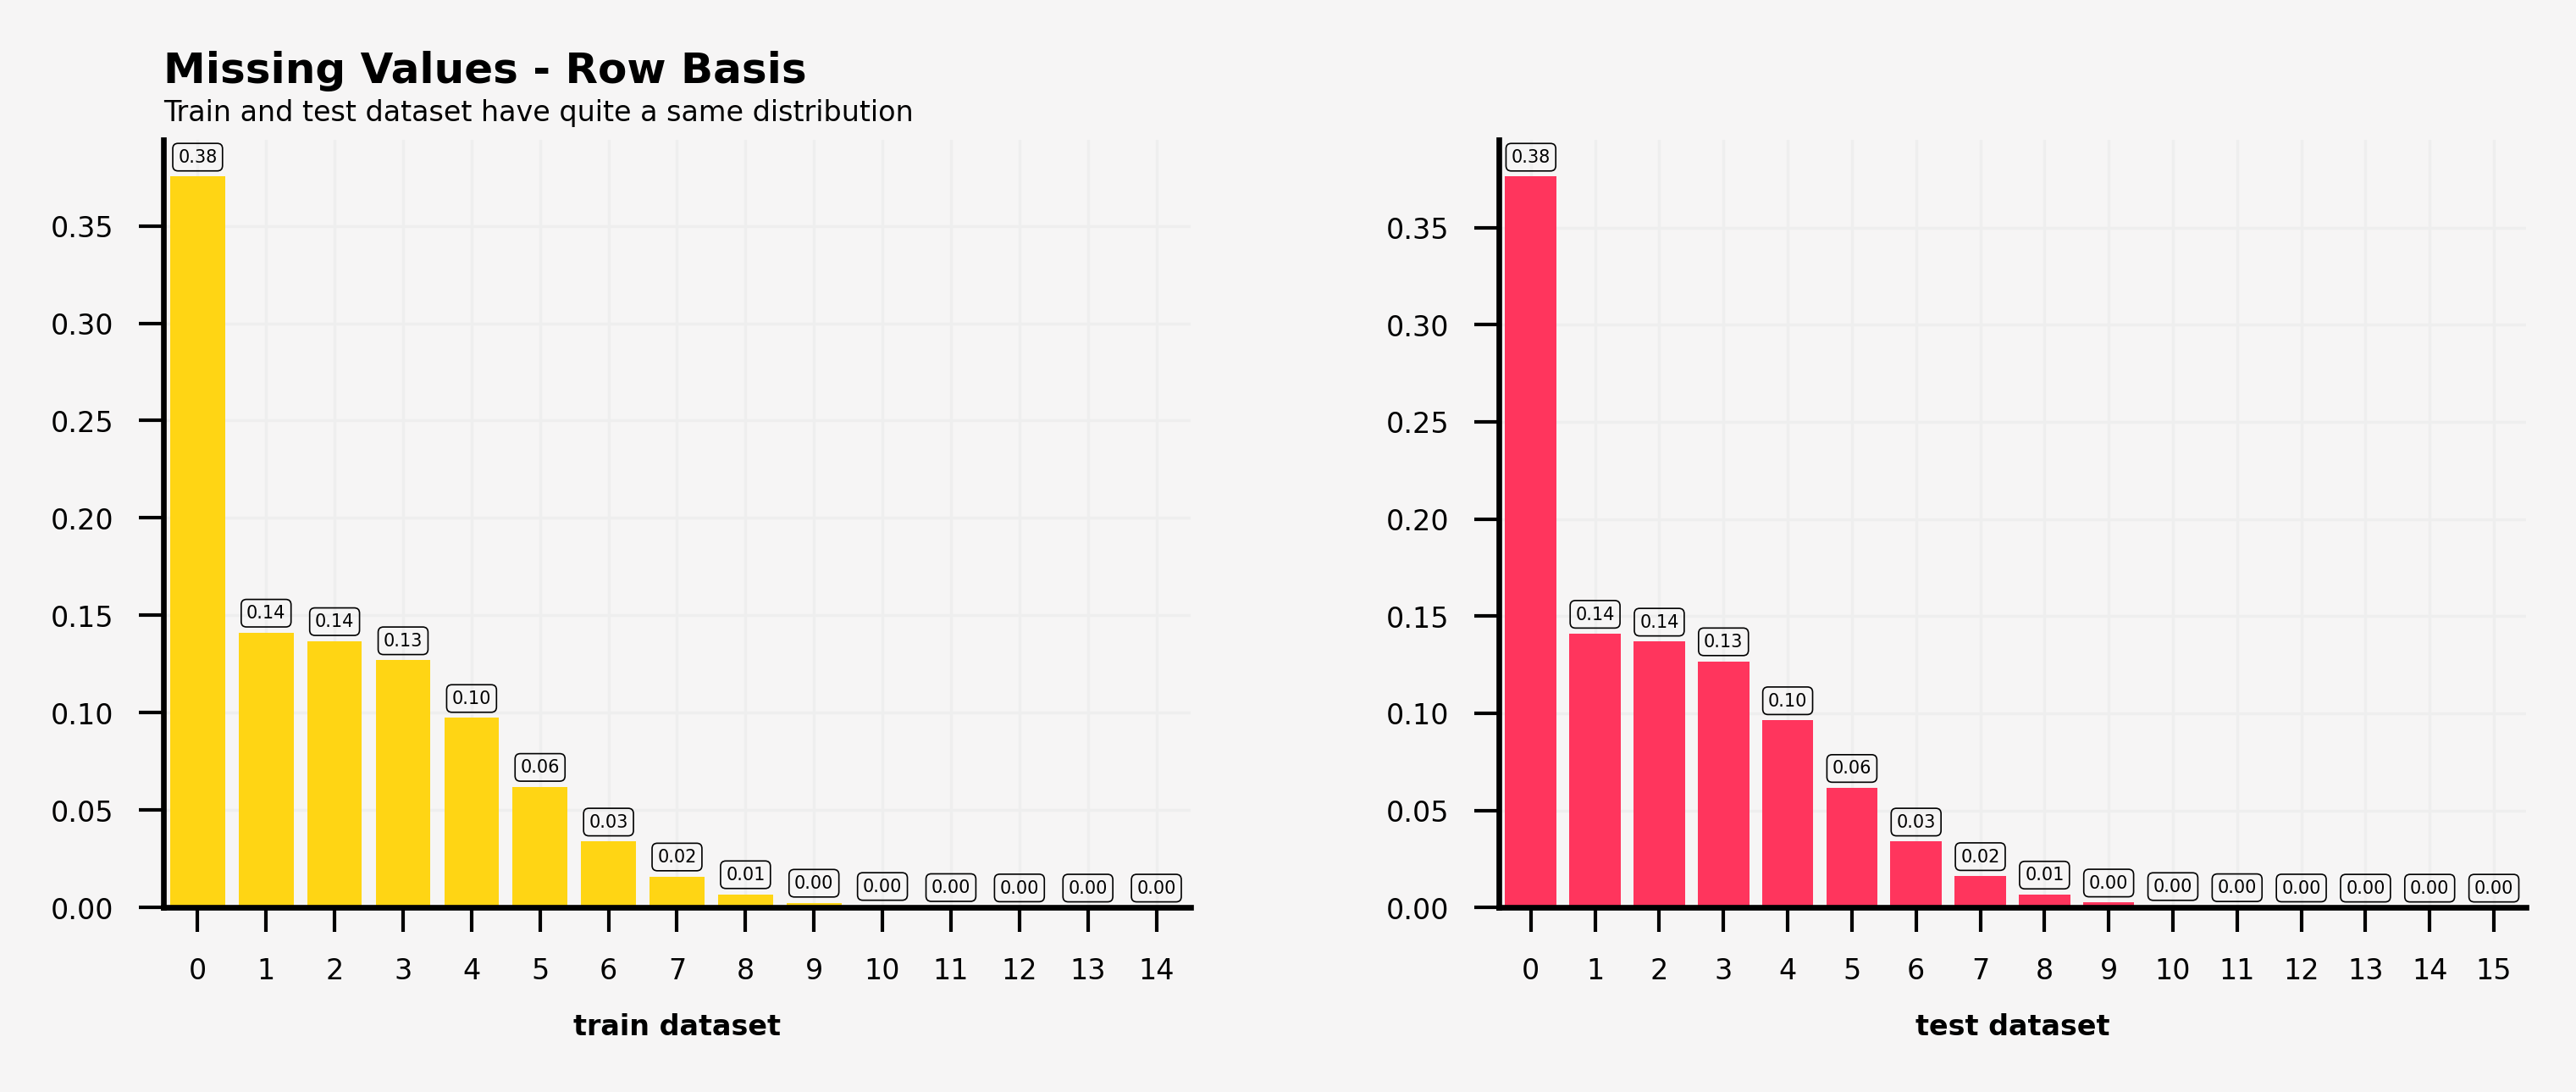

In [24]:
background_color = "#f6f5f5"

plt.rcParams['figure.dpi'] = 600
fig = plt.figure(figsize=(6, 2), facecolor='#f6f5f5')
gs = fig.add_gridspec(1, 2)
gs.update(wspace=0.3, hspace=0.3)

run_no = 0
for row in range(0, 1):
    for col in range(0, 2):
        locals()["ax"+str(run_no)] = fig.add_subplot(gs[row, col])
        locals()["ax"+str(run_no)].set_facecolor(background_color)
        for s in ["top","right"]:
            locals()["ax"+str(run_no)].spines[s].set_visible(False)
        run_no += 1  

sns.barplot(ax=ax0, x=missing_train_row['no'], y=missing_train_row['count'], saturation=1, zorder=2, color='#ffd514')
ax0.grid(which='major', axis='x', zorder=0, color='#EEEEEE', linewidth=0.4)
ax0.grid(which='major', axis='y', zorder=0, color='#EEEEEE', linewidth=0.4)
ax0.set_ylabel('')
ax0.set_xlabel('train dataset', fontsize=4, fontweight='bold')
ax0.tick_params(labelsize=4, width=0.5)
ax0.xaxis.offsetText.set_fontsize(4)
ax0.yaxis.offsetText.set_fontsize(4)

ax0.text(-0.5, 0.44, 'Missing Values - Row Basis', fontsize=6, ha='left', va='top', weight='bold')
ax0.text(-0.5, 0.415, 'Train and test dataset have quite a same distribution', fontsize=4, ha='left', va='top')

# data label
for p in ax0.patches:
    value = f'{p.get_height():.2f}'
    x = p.get_x() + p.get_width() - 0.4
    y = p.get_y() + p.get_height() + 0.01 
    ax0.text(x, y, value, ha='center', va='center', fontsize=2.5, 
            bbox=dict(facecolor='none', edgecolor='black', boxstyle='round', linewidth=0.2))

sns.barplot(ax=ax1, x=missing_test_row['no'], y=missing_test_row['count'], saturation=1, zorder=2, color='#ff355d')
ax1.grid(which='major', axis='x', zorder=0, color='#EEEEEE', linewidth=0.4)
ax1.grid(which='major', axis='y', zorder=0, color='#EEEEEE', linewidth=0.4)
ax1.set_ylabel('')
ax1.set_xlabel('test dataset', fontsize=4, fontweight='bold')
ax1.tick_params(labelsize=4, width=0.5)
ax1.xaxis.offsetText.set_fontsize(4)
ax1.yaxis.offsetText.set_fontsize(4)

# data label
for p in ax1.patches:
    value = f'{p.get_height():.2f}'
    x = p.get_x() + p.get_width() - 0.4
    y = p.get_y() + p.get_height() + 0.01 
    ax1.text(x, y, value, ha='center', va='center', fontsize=2.5, 
            bbox=dict(facecolor='none', edgecolor='black', boxstyle='round', linewidth=0.2))

plt.show()

In [25]:
claim_data = pd.DataFrame(train_data['claim'].value_counts()).reset_index()

In [26]:
claim_data

,index,claim
0,0,480404
1,1,477515


In [27]:
claim_data.columns = ['claim', 'count']

In [28]:
claim_data

,claim,count
0,0,480404
1,1,477515


**Claim Percent**

In [29]:
claim_percent_data = pd.DataFrame(train_data['claim'].value_counts()/train_data.shape[0]).reset_index()
claim_percent_data.columns = ['claim', 'count']

In [30]:
claim_percent_data

,claim,count
0,0,0.501508
1,1,0.498492


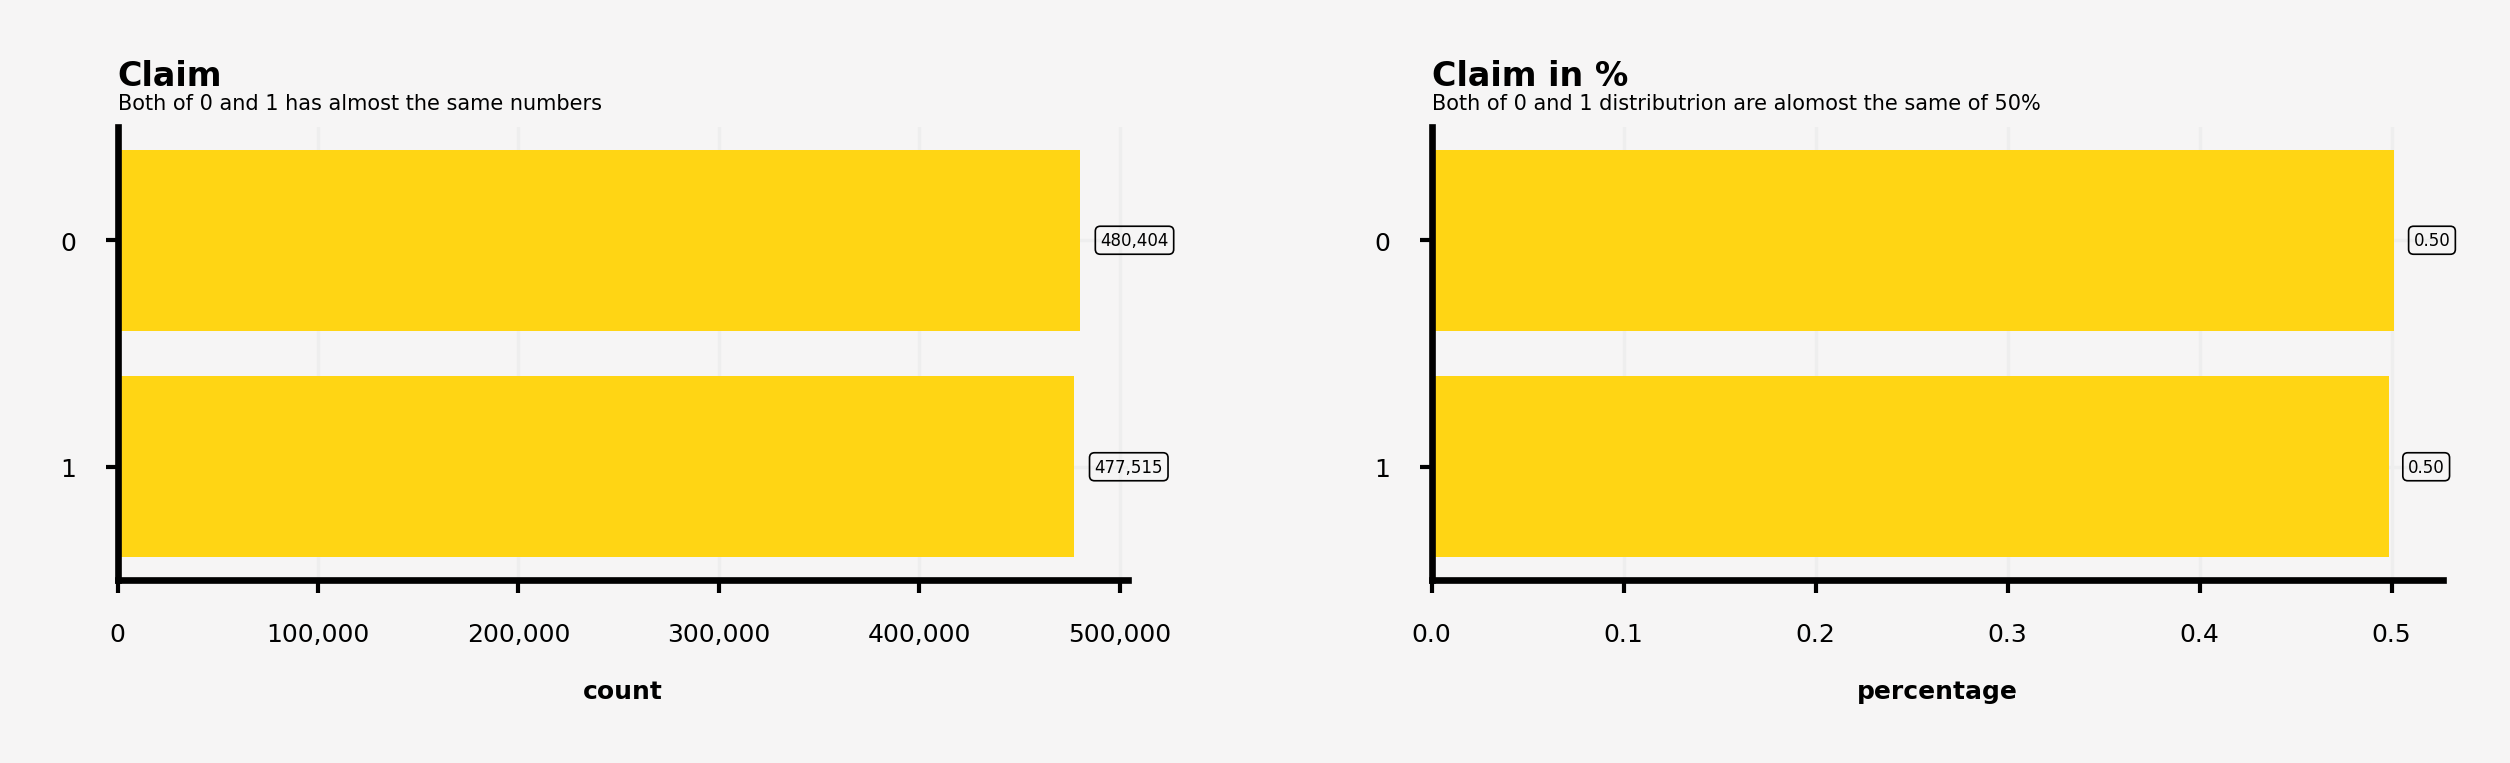

In [31]:
plt.rcParams['figure.dpi'] = 600
fig = plt.figure(figsize=(5, 1), facecolor='#f6f5f5')
gs = fig.add_gridspec(1, 2)
gs.update(wspace=0.3, hspace=0.05)

background_color = "#f6f5f5"
sns.set_palette(['#ffd514']*120)

ax0 = fig.add_subplot(gs[0, 0])
for s in ["right", "top"]:
    ax0.spines[s].set_visible(False)
ax0.set_facecolor(background_color)
ax0_sns = sns.barplot(ax=ax0, y=claim_data['claim'], x=claim_data['count'], 
                      zorder=2, linewidth=0, orient='h', saturation=1, alpha=1)
ax0_sns.set_xlabel("count",fontsize=3, weight='bold')
ax0_sns.set_ylabel("",fontsize=3, weight='bold')
ax0_sns.tick_params(labelsize=3, width=0.5, length=1.5)
ax0_sns.grid(which='major', axis='x', zorder=0, color='#EEEEEE', linewidth=0.4)
ax0_sns.grid(which='major', axis='y', zorder=0, color='#EEEEEE', linewidth=0.4)
ax0.text(0, -0.8, 'Claim', fontsize=4, ha='left', va='top', weight='bold')
ax0.text(0, -0.65, 'Both of 0 and 1 has almost the same numbers', fontsize=2.5, ha='left', va='top')
ax0.get_xaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
# data label
for p in ax0.patches:
    value = f'{p.get_width():,.0f}'
    x = p.get_x() + p.get_width() + 10000
    y = p.get_y() + p.get_height() / 2 
    ax0.text(x, y, value, ha='left', va='center', fontsize=2, 
            bbox=dict(facecolor='none', edgecolor='black', boxstyle='round', linewidth=0.2))
    
ax1 = fig.add_subplot(gs[0, 1])
for s in ["right", "top"]:
    ax1.spines[s].set_visible(False)
ax1.set_facecolor(background_color)
ax1_sns = sns.barplot(ax=ax1, y=claim_percent_data['claim'], x=claim_percent_data['count'], 
                      zorder=2, linewidth=0, orient='h', saturation=1, alpha=1)
ax1_sns.set_xlabel("percentage",fontsize=3, weight='bold')
ax1_sns.set_ylabel("",fontsize=3, weight='bold')
ax1_sns.tick_params(labelsize=3, width=0.5, length=1.5)
ax1_sns.grid(which='major', axis='x', zorder=0, color='#EEEEEE', linewidth=0.4)
ax1_sns.grid(which='major', axis='y', zorder=0, color='#EEEEEE', linewidth=0.4)
ax1.text(0, -0.8, 'Claim in %', fontsize=4, ha='left', va='top', weight='bold')
ax1.text(0, -0.65, 'Both of 0 and 1 distributrion are alomost the same of 50%', fontsize=2.5, ha='left', va='top')
# data label
for p in ax1.patches:
    value = f'{p.get_width():.2f}'
    x = p.get_x() + p.get_width() + 0.01
    y = p.get_y() + p.get_height() / 2 
    ax1.text(x, y, value, ha='left', va='center', fontsize=2, 
            bbox=dict(facecolor='none', edgecolor='black', boxstyle='round', linewidth=0.2))

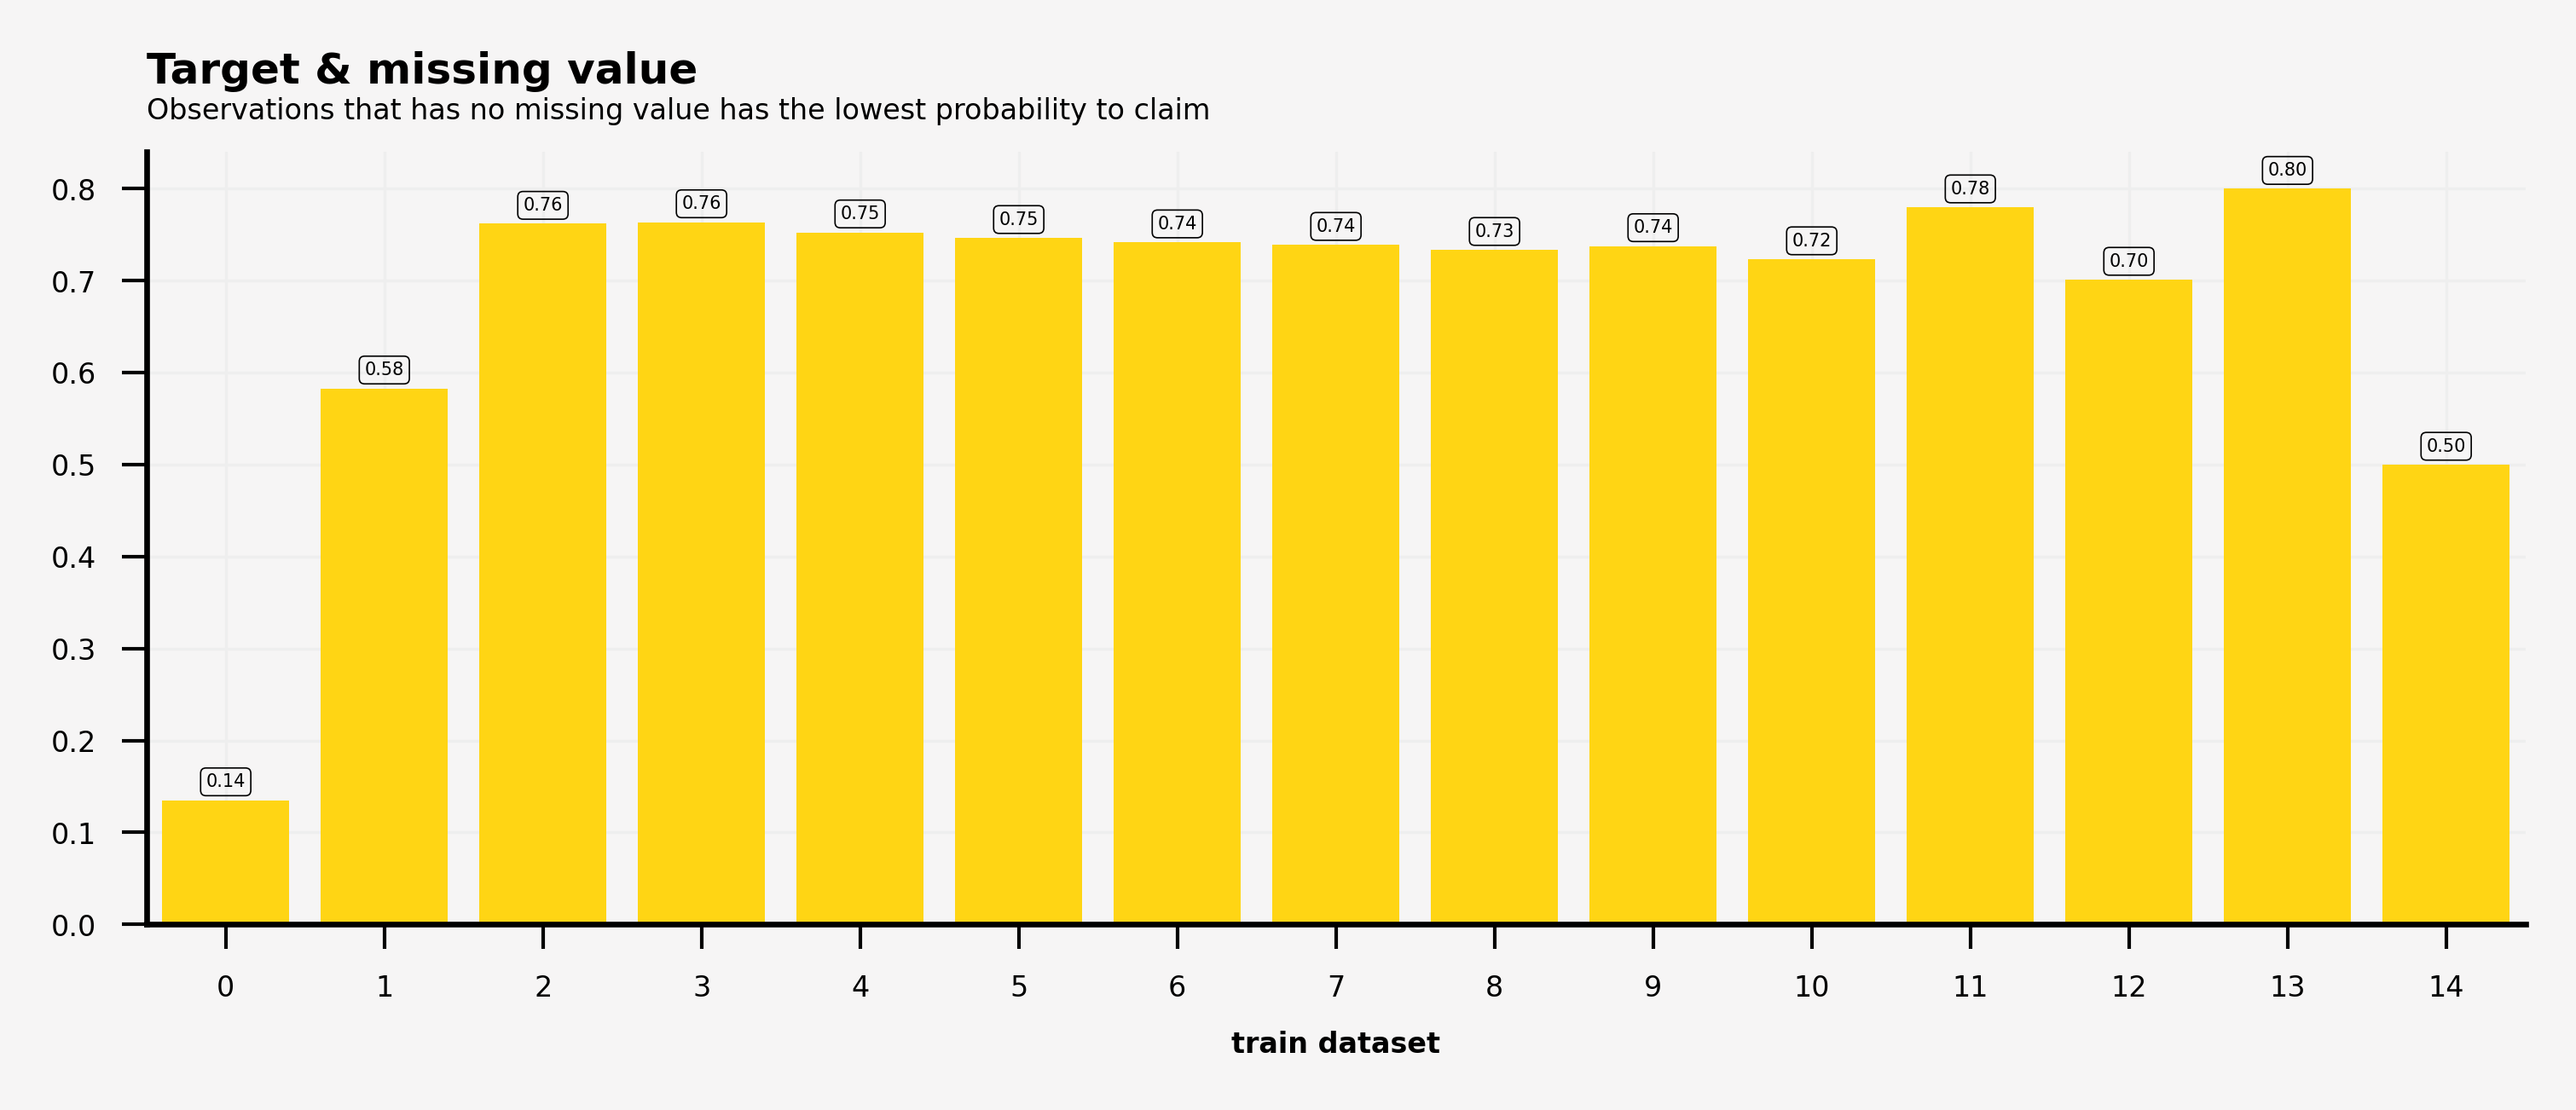

In [32]:
features = [feature for feature in train_data.columns if feature not in ['id', 'claim']]
train_data['no_missing'] = train_data[features].isna().sum(axis=1)
test_data['no_missing'] = test_data[features].isna().sum(axis=1)

missing_target = pd.DataFrame(train_data.groupby('no_missing')['claim'].agg('mean')).reset_index()
missing_target.columns = ['no', 'mean']

background_color = "#f6f5f5"

plt.rcParams['figure.dpi'] = 600
fig = plt.figure(figsize=(6, 2), facecolor='#f6f5f5')
gs = fig.add_gridspec(1, 1)
gs.update(wspace=0.3, hspace=0.3)

ax0 = fig.add_subplot(gs[0, 0])
ax0.set_facecolor(background_color)
for s in ["top","right"]:
    ax0.spines[s].set_visible(False)

sns.barplot(ax=ax0, x=missing_target['no'], y=missing_target['mean'], saturation=1, zorder=2, color='#ffd514')
ax0.grid(which='major', axis='x', zorder=0, color='#EEEEEE', linewidth=0.4)
ax0.grid(which='major', axis='y', zorder=0, color='#EEEEEE', linewidth=0.4)
ax0.set_ylabel('')
ax0.set_xlabel('train dataset', fontsize=4, fontweight='bold')
ax0.tick_params(labelsize=4, width=0.5)
ax0.xaxis.offsetText.set_fontsize(4)
ax0.yaxis.offsetText.set_fontsize(4)

ax0.text(-0.5, 0.95, 'Target & missing value', fontsize=6, ha='left', va='top', weight='bold')
ax0.text(-0.5, 0.9, 'Observations that has no missing value has the lowest probability to claim', fontsize=4, ha='left', va='top')

# data label
for p in ax0.patches:
    value = f'{p.get_height():.2f}'
    x = p.get_x() + p.get_width() - 0.4
    y = p.get_y() + p.get_height() + 0.02
    ax0.text(x, y, value, ha='center', va='center', fontsize=2.5, 
            bbox=dict(facecolor='none', edgecolor='black', boxstyle='round', linewidth=0.2))

plt.show()

In [33]:
# import packages
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LinearRegression
from scipy.stats import boxcox
from xgboost import XGBClassifier 
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier

# import datasets
#train_df = pd.read_csv('../input/tabular-playground-series-sep-2021/train.csv')

folds = 5
features = list(train_data.columns[1:119])

# Base Model

In [34]:
train_data.head()

,id,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24,f25,f26,f27,f28,f29,f30,f31,f32,f33,f34,f35,f36,f37,f38,f39,f40,f41,f42,f43,f44,f45,f46,f47,f48,f49,f50,f51,f52,f53,f54,f55,f56,f57,f58,f59,f60,f61,f62,f63,f64,f65,f66,f67,f68,f69,f70,f71,f72,f73,f74,f75,f76,f77,f78,f79,f80,f81,f82,f83,f84,f85,f86,f87,f88,f89,f90,f91,f92,f93,f94,f95,f96,f97,f98,f99,f100,f101,f102,f103,f104,f105,f106,f107,f108,f109,f110,f111,f112,f113,f114,f115,f116,f117,f118,claim,no_missing
0,0,0.108590,0.004314,-37.566000,0.017364,0.289150,-10.251000,135.120000,168900.000000,399240000000000.000000,86.489000,0.598810,1423200000.000000,0.272400,9.455600,-0.050305,1938.300000,8.633100,4.060700,26.867000,-1.180000,10961.000000,1.539700,135.320000,-1.496500,440.080000,2590100000000.000000,2194200000.000000,2968800.000000,0.001431,13.327000,0.750500,18509.000000,146820.000000,-0.000276,10906000000000000.000000,1705.400000,414.290000,3.539200,1888.000000,0.968930,18.388000,-0.001583,7.705900,5.932500,0.025693,4.560400,0.611220,10.795000,0.341930,0.235010,NaN,5237.700000,1.296100,163.660000,0.403780,0.188600,-0.001446,-0.354160,6.643200,0.305340,0.514020,1907300000.000000,29.861000,0.965010,1797.200000,72.178000,108.620000,1.979900,1.290700,0.995190,1.322800,827.340000,777990000000000.000000,41299000000.000000,0.006994,6.983500,43956.000000,1978.200000,5.508400,-0.001081,6.124400,123180000000.000000,275.920000,5308500.000000,1704.000000,50224000000.000000,53.398000,-2.201200,6871.000000,3.886200,-0.005580,5252.100000,166.690000,1.607400,0.665340,7768.900000,0.996620,112570000000.000000,2.243200,0.934160,0.650560,94569.000000,21.471000,8214.100000,0.288010,0.097826,0.001071,1412400000.000000,0.110930,-12.228000,1.748200,1.909600,-7.115700,4378.800000,1.209600,861340000000000.000000,140.100000,1.017700,1,1
1,1,0.100900,0.299610,11822.000000,0.276500,0.459700,-0.837330,1721.900000,119810.000000,3874100000000000.000000,9953.600000,1.209300,3334100000.000000,0.286310,-0.012858,-0.019912,10.284000,6.187200,1.041900,4.640400,31.877000,123620.000000,1.395100,125.810000,1.198900,136.450000,9098100000.000000,40041000000.000000,1564000.000000,0.000204,3.107400,1.503300,238000.000000,21440.000000,-0.001344,30794000000000000.000000,229.100000,844.820000,1.468000,4726.500000,0.915380,-1.532100,0.982600,7.111200,2.079700,0.042321,4.252300,0.418710,5.449900,0.012737,0.386470,7.308200,283.210000,-0.925520,140.800000,0.247390,-0.001656,-0.000975,-0.226290,2.424600,0.771470,0.011613,1803700000.000000,64.604000,0.262650,4455.000000,78.339000,745.510000,2.906900,1.482600,1.005100,1.497400,84.446000,3505600000000000.000000,2242300000.000000,0.896300,4.674900,17713.000000,9003.100000,-4.354600,0.254100,6.919100,183240000000.000000,9.651000,32800.000000,1480.600000,23006000000.000000,44.051000,205.690000,4295.300000,13.388000,0.468430,754.610000,83.233000,1.189000,29.550000,7343.700000,0.998150,48777000000000.000000,1.270800,-0.000969,5.295200,6779.000000,227.720000,34.342000,0.340300,0.143370,0.049276,1903200000.000000,0.976730,-56.758000,4.168400,0.348080,4.142000,913.230000,1.246400,7575100000000000.000000,1861.000000,0.283590,0,0
2,2,0.178030,-0.006980,907.270000,0.272140,0.459480,0.173270,2298.000000,360650.000000,12245000000000.000000,15827.000000,0.381640,1230300000.000000,0.258070,2.455600,NaN,26.873000,7.546300,1.996700,1.952600,817.760000,-2948.700000,2.005400,1.682600,1.196800,74.624000,-32739000000.000000,57189000000.000000,11058.000000,-0.003097,8.024100,1.131800,27940.000000,862460.000000,-0.002207,58491000000000.000000,-897.840000,NaN,1.356100,3063.400000,0.086232,16.106000,0.001481,11.476000,5.343000,0.012162,4.101800,-0.882700,8.122800,-0.676690,0.337700,-1.073200,4097.000000,13.458000,159.240000,0.322300,0.560090,0.000455,-0.160830,3.575300,0.609700,0.028301,527130000.000000,14.454000,0.115490,14605.000000,36.992000,-9.639100,64.267000,NaN,0.992780,2.589100,430.400000,-44535000000000.000000,5144900000000.000000,0.099591,6.551600,188

In [35]:
train_data[features].shape[0]

957919

In [37]:
lists = train_data[features].columns.to_list()

In [38]:
print(train_data[features].columns.values)

['f1' 'f2' 'f3' 'f4' 'f5' 'f6' 'f7' 'f8' 'f9' 'f10' 'f11' 'f12' 'f13'
 'f14' 'f15' 'f16' 'f17' 'f18' 'f19' 'f20' 'f21' 'f22' 'f23' 'f24' 'f25'
 'f26' 'f27' 'f28' 'f29' 'f30' 'f31' 'f32' 'f33' 'f34' 'f35' 'f36' 'f37'
 'f38' 'f39' 'f40' 'f41' 'f42' 'f43' 'f44' 'f45' 'f46' 'f47' 'f48' 'f49'
 'f50' 'f51' 'f52' 'f53' 'f54' 'f55' 'f56' 'f57' 'f58' 'f59' 'f60' 'f61'
 'f62' 'f63' 'f64' 'f65' 'f66' 'f67' 'f68' 'f69' 'f70' 'f71' 'f72' 'f73'
 'f74' 'f75' 'f76' 'f77' 'f78' 'f79' 'f80' 'f81' 'f82' 'f83' 'f84' 'f85'
 'f86' 'f87' 'f88' 'f89' 'f90' 'f91' 'f92' 'f93' 'f94' 'f95' 'f96' 'f97'
 'f98' 'f99' 'f100' 'f101' 'f102' 'f103' 'f104' 'f105' 'f106' 'f107'
 'f108' 'f109' 'f110' 'f111' 'f112' 'f113' 'f114' 'f115' 'f116' 'f117'
 'f118']


In [81]:
train_oof = np.zeros((957919,))
skf = StratifiedKFold(n_splits=folds, shuffle=True, random_state=42)
for fold, (train_idx, valid_idx) in enumerate(skf.split(train_data[features], train_data['claim'])):
    X_train, X_valid = train_data.iloc[train_idx], train_data.iloc[valid_idx]
    y_train = X_train['claim']
    y_valid = X_valid['claim']
    X_train = X_train.drop('claim', axis=1)
    X_valid = X_valid.drop('claim', axis=1)

    model = XGBClassifier(random_state=42, verbosity=0, tree_method='gpu_hist')

    model =  model.fit(X_train, y_train, verbose=0)
    temp_oof = model.predict_proba(X_valid)[:, 1]
    train_oof[valid_idx] = temp_oof
    print(f'Fold {fold} AUC: ', roc_auc_score(y_valid, temp_oof))
    
print(f'OOF AUC: ', roc_auc_score(train_data['claim'], train_oof))

Fold 0 AUC:  0.8098879527931927
Fold 1 AUC:  0.8115469166239712
Fold 2 AUC:  0.8105124950961017
Fold 3 AUC:  0.8100067496741218
Fold 4 AUC:  0.809383286600332
OOF AUC:  0.8102656082827964


In [82]:
sub_data.count()

id       493474
claim    493474
dtype: int64

In [83]:
test_data.shape[0]

493474

In [84]:
temp_sol = model.predict_proba(test_data)[:, 1]

In [85]:
temp_sol

array([0.5448866 , 0.10348418, 0.6384185 , ..., 0.66228473, 0.1417252 ,
       0.756866  ], dtype=float32)

In [86]:
len(temp_sol)

493474

In [87]:
sub_data.head()

,id,claim
0,957919,0.500000
1,957920,0.500000
2,957921,0.500000
3,957922,0.500000
4,957923,0.500000


In [88]:
sub_data['claim'] = temp_sol

In [89]:
sub_data.head()

,id,claim
0,957919,0.544887
1,957920,0.103484
2,957921,0.638418
3,957922,0.089494
4,957923,0.120472


In [90]:
pwd

'/kaggle/working'

In [91]:
submission = pd.DataFrame(sub_data)

In [92]:
submission.to_csv('submission_file.csv', index=False)

In [93]:
sub_filer = pd.read_csv("./submission_file.csv")

In [94]:
sub_filer.head()

,id,claim
0,957919,0.544887
1,957920,0.103484
2,957921,0.638418
3,957922,0.089494
4,957923,0.120472
